In [1]:
!pip install scikit-learn
!pip install numpy
!pip install matplotlib


[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random

In [3]:
# Sample data (linear functions)
x = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(x, np.array([1, 2])) / 3

print(y)
model = LinearRegression().fit(x, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict a new value
pre = model.predict(x)
print("Predicted value:", pre)
print("score of model:",model.score(x,y))
rms = 0
n=len(y)
for i in range(n):
    rms+=(y[i] - pre[i])**2
rms = round((rms/n)**1/2,4)
print("rms:-",rms)


[1.         1.66666667 2.         2.66666667]
Coefficients: [0.33333333 0.66666667]
Intercept: 4.440892098500626e-16
Predicted value: [1.         1.66666667 2.         2.66666667]
score of model: 1.0
rms:- 0.0


In [4]:
# Sample for testing non leanear functions data
x = np.array([[1, 1], [1, 2], [2, 2], [2, 3], [4, 3], [2, 5], [2, 3], [6, 3], [7, 8], [3, 9], [5, 6], [3, 1]])
y = np.dot(x**2, np.array([1, 2])) / 3

print("observed:- ", y)
model = LinearRegression().fit(x, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict a new value
pre = model.predict(x)
print("Predicted value:", pre)
print("score of model:",model.score(x,y))
rms = 0
n=len(y)
for i in range(n):
    rms+=(y[i] - pre[i])**2
rms = round((rms/(n*np.mean(y)))**0.5,4)
print("rms:",rms)

observed:-  [ 1.          3.          4.          7.33333333 11.33333333 18.
  7.33333333 18.         59.         57.         32.33333333  3.66666667]
Coefficients: [2.10862295 6.69797877]
Intercept: -13.85289128011248
Predicted value: [-5.04628956  1.65168921  3.76031215 10.45829092 14.67553681 23.85424846
 10.45829092 18.89278271 54.4912995  52.75478649 36.87809607 -0.82904367]
score of model: 0.9600556890857592
rms: 0.909


In [5]:
def calculate_rms(y,cal_y):
    n=len(y)
    rms = 0
    for i in range(n):
        rms+=(y[i] - cal_y[i])**2
    rms = round((rms/n)**0.5,8)/np.mean(y)
    return rms

Coefficients: [1.27585633]
Intercept: 0.23251977010097136
0.24555274189415177
0.20032298368598747


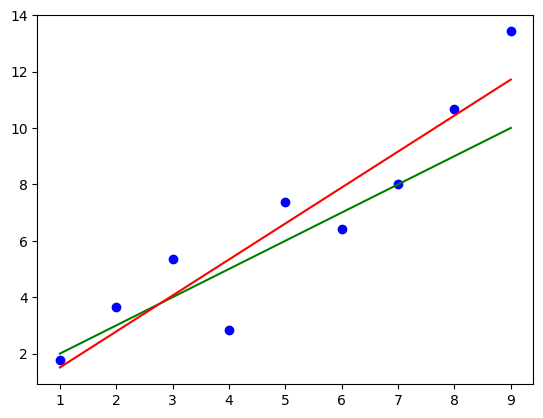

In [6]:
x = [1,2,3,4,5,6,7,8,9]
a=1
b=1
error = 0.8
rd = random.random
add_error = lambda x: x + error * (rd() * 2 - 1)
y = [i*add_error(a) + add_error(b) for i in x]

plt.scatter(x, y, color='blue')
cal_y = [i*a+b for i in x]
plt.plot(x,cal_y, color='green')
x_reshaped = np.array(x).reshape(-1, 1)
model = LinearRegression().fit(x_reshaped, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
pre_y = [i*model.coef_[0] +model.intercept_ for i in x]
plt.plot(x,pre_y, color='red')



print(calculate_rms(y,cal_y))
print(calculate_rms(y,pre_y))

In [7]:


def compute_gradients(x, y, a, b):

    n = len(x)
    y_pred = a * x + b
    error = y - y_pred

    # Gradients
    da = -(2 / n) * np.sum(x * error)  # Partial derivative w.r.t. m
    db = -(2 / n) * np.sum(error)      # Partial derivative w.r.t. b

    return da, db


1.872656501967372 -0.0998148566430852
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
0.001 0.001
1.333916470662118 -0.13280964533132505
rms: 0.20192112756732528
0.20192112756732528


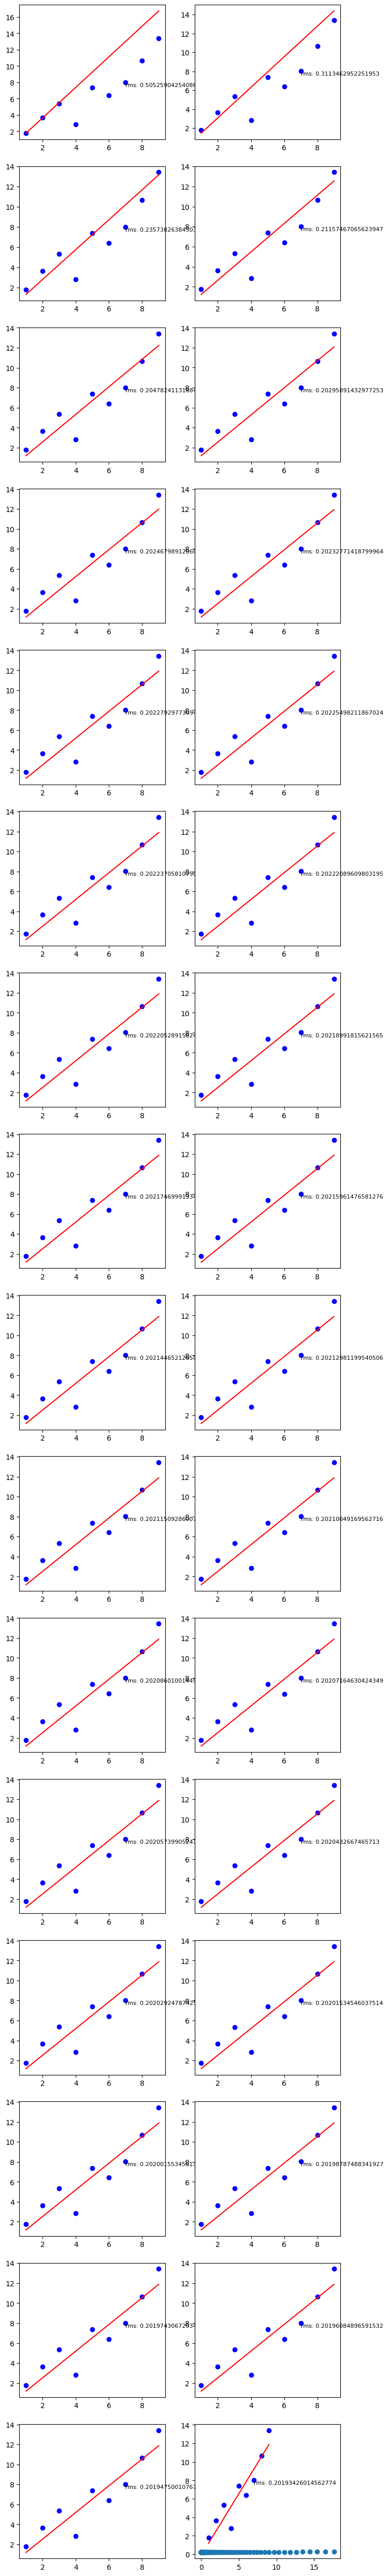

In [8]:
#using np

def create_model(x,y):
    fig, axes = plt.subplots(16, 2, figsize=(8, 64))
    axes = axes.flatten()
    n=len(x)
    a = (y[0]-y[1]) / (x[0]-x[1])
    b = y[0] - a*x[0]
    print(a,b)
    cal_y = (x*a)+b
    dir1=1
    dir2=1
    rate1 = 0.1
    rate2 = 0.1
    frate = 0.001
    da, db = compute_gradients(x, y, a, b)
    r=[]
    ra=[]
    rb=[]
    momentum_a = 0  # Initialize momentum for a
    momentum_b = 0
    
    for i in range(320):
        if i%10 == 0:
            print(rate1, rate2)
            axes[int(i/10)].scatter(x,  y, color='blue')
            axes[int(i/10)].text(7, 8, f"rms: {calculate_rms(y,cal_y)}", fontsize=8, color='black', ha='left', va='top')
            axes[int(i/10)].plot(x, cal_y, label=f'y = {a}x + {b}', color='red')
        da, db = compute_gradients(x, y, a, b)
        momentum_a = 0.0 * momentum_a + 1.0 * da
        momentum_b = 0.0 * momentum_b + 1.0 * db
        a = a - rate1 * momentum_a
        b = b - rate2 * momentum_b
        cal_y = (x*a)+b
        # Check the direction of the gradients and adjust learning rates
        if rate1 > frate and rate2 > frate:
            if (da < 0 and dir1) or (da > 0 and not(dir1)):
                rate1 /= 1.5  # Reduce learning rate for a if gradient changes direction
                dir1 = not(dir1)  # Flip the direction flag for a
            if (db < 0 and dir2) or (db > 0 and not(dir2)):
                rate2 /= 1.5  # Reduce learning rate for b if gradient changes direction
                dir2 = not(dir2)  # Flip the direction flag for b
        #print(rate1,rate2)
        r.append(calculate_rms(y,cal_y))
        
        ra.append(da)
        rb.append(db)
    return float(a),float(b),r,ra,rb
a,b,r,ra,rb = create_model(np.array(x),np.array(y))
x=np.array(x)
print(a,b)
cal_y = (x*a)+b
print(f"rms: {calculate_rms(y,cal_y)}")
print(r[-1])
plt.scatter(ra[10::],r[10::])